In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [23]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations, 1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1,(observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [24]:
training_data = np.load('TF_intro.npz')

In [25]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 33.4339
Epoch 2/100
1000/1000 - 0s - loss: 4.2794
Epoch 3/100
1000/1000 - 0s - loss: 1.4213
Epoch 4/100
1000/1000 - 0s - loss: 0.6424
Epoch 5/100
1000/1000 - 0s - loss: 0.4141
Epoch 6/100
1000/1000 - 0s - loss: 0.3544
Epoch 7/100
1000/1000 - 0s - loss: 0.3477
Epoch 8/100
1000/1000 - 0s - loss: 0.3309
Epoch 9/100
1000/1000 - 0s - loss: 0.3309
Epoch 10/100
1000/1000 - 0s - loss: 0.3337
Epoch 11/100
1000/1000 - 0s - loss: 0.3315
Epoch 12/100
1000/1000 - 0s - loss: 0.3367
Epoch 13/100
1000/1000 - 0s - loss: 0.3339
Epoch 14/100
1000/1000 - 0s - loss: 0.3317
Epoch 15/100
1000/1000 - 0s - loss: 0.3336
Epoch 16/100
1000/1000 - 0s - loss: 0.3338
Epoch 17/100
1000/1000 - 0s - loss: 0.3294
Epoch 18/100
1000/1000 - 0s - loss: 0.3387
Epoch 19/100
1000/1000 - 0s - loss: 0.3312
Epoch 20/100
1000/1000 - 0s - loss: 0.3288
Epoch 21/100
1000/1000 - 0s - loss: 0.3311
Epoch 22/100
1000/1000 - 0s - loss: 0.3318
Epoch 23/100
1000/1000 - 0s - loss: 0.32

In [26]:
model.layers[0].get_weights()

[array([[ 2.0247376],
        [-3.0255497]], dtype=float32),
 array([5.010382], dtype=float32)]

In [27]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0247376],
       [-3.0255497]], dtype=float32)

In [28]:
bias = model.layers[0].get_weights()[1]
bias

array([5.010382], dtype=float32)

In [29]:
model.predict_on_batch(training_data['inputs']).numpy().round(1)

array([[-23.7],
       [ 13. ],
       [ 31.8],
       [ 32.6],
       [ -1.8],
       [ 38.2],
       [-21.8],
       [  7.1],
       [ 34.7],
       [ 32.3],
       [  5.9],
       [ -0.5],
       [ 26.1],
       [ 16.5],
       [ -5.2],
       [ 13. ],
       [ 13.5],
       [-15.9],
       [ 46.5],
       [-24.4],
       [  0.5],
       [ 35.2],
       [ 26.2],
       [  9.4],
       [ 20.5],
       [ -4.9],
       [-26.2],
       [ 29.5],
       [-17. ],
       [ 25.3],
       [-39.9],
       [ -0.4],
       [ -4.7],
       [  9.9],
       [ 37.6],
       [  2.5],
       [-24.5],
       [ -5.9],
       [-20.2],
       [-34.2],
       [ -7.8],
       [ 26.6],
       [ 21.7],
       [-18.9],
       [ 36.6],
       [-17.4],
       [ 32.7],
       [ 26.2],
       [ 36.3],
       [ 46. ],
       [  3.5],
       [-11.8],
       [ 28.6],
       [ -2.4],
       [ 42.2],
       [ 22.8],
       [ 47. ],
       [ -2.7],
       [-19.2],
       [  9.3],
       [ 20.5],
       [  0.2],
       [

In [30]:
training_data['targets'].round(1)

array([[-23.2],
       [ 12.2],
       [ 31. ],
       [ 31.9],
       [ -1.6],
       [ 38.5],
       [-22.1],
       [  7.5],
       [ 35.1],
       [ 32.4],
       [  5.7],
       [ -0.1],
       [ 25.5],
       [ 16. ],
       [ -5.5],
       [ 13.3],
       [ 13.9],
       [-16.7],
       [ 46.6],
       [-25. ],
       [  1.5],
       [ 34.9],
       [ 26.3],
       [  9. ],
       [ 20.1],
       [ -5.9],
       [-25.9],
       [ 29.1],
       [-16.7],
       [ 25.8],
       [-39.6],
       [ -0.5],
       [ -4. ],
       [ 10.4],
       [ 37.6],
       [  1.8],
       [-24.2],
       [ -5. ],
       [-19.3],
       [-33.7],
       [ -8.1],
       [ 26.8],
       [ 21.1],
       [-17.9],
       [ 36.6],
       [-16.7],
       [ 32. ],
       [ 26.1],
       [ 35.4],
       [ 45.9],
       [  4. ],
       [-11.8],
       [ 27.3],
       [ -3.1],
       [ 42. ],
       [ 23.4],
       [ 46.9],
       [ -1.8],
       [-18.9],
       [  9.8],
       [ 19.8],
       [  0.6],
       [

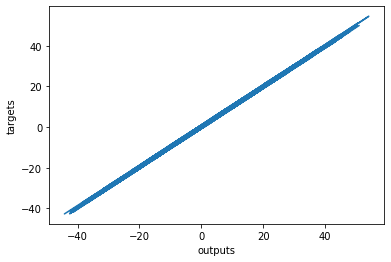

In [31]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()